## Softmax Regressor (TensorFlow)

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data # deprecated
# from tensorflow import keras

In [4]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True) # deprecated
# mnist = tf.keras.datasets.mnist
#(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist.train.images, mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 55000, 10000, 5000)

### Visualizing the data

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
mnist.train.images[1].shape # already flattened!

(784,)

In [8]:
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

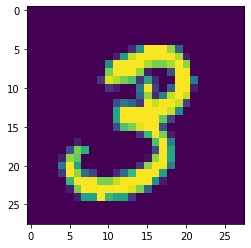

In [9]:
# standard visualization
plt.imshow(mnist.train.images[1].reshape(28,28))

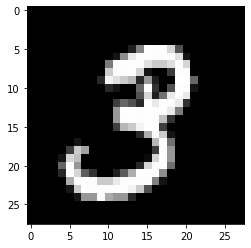

In [10]:
# black white
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

In [11]:
mnist.train.images[1].max(), mnist.train.images[1].min()

(1.0, 0.0)

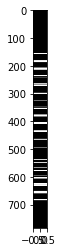

In [12]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

### Model Creation

In [13]:
## Placeholders
x = tf.placeholder(tf.float32,shape=[None,784]) #image data, None -> Batch size
y_true = tf.placeholder(tf.float32,[None,10]) # true labels are OHE-arrays

In [14]:
## Variables
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [15]:
## Graph creation (operations)
# Create the Graph
y = tf.matmul(x,W) + b 

In [16]:
## Loss function
### Logits == results from networks
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

## Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

## Training 
train = optimizer.minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
## Session
init = tf.global_variables_initializer()
EPOCHS = 1000
BATCH_SIZE = 100
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(EPOCHS):

        batch_x , batch_y = mnist.train.next_batch(BATCH_SIZE)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Test the Train Model
    # argmax ==> search for the index with highest probability
    # Comparison between actual true values and model predictions
    # [True, False, True,....]
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    ## Conversion [1.0, 0.0, 1.0,...]
    ## reduce mean --> accuracy as percentage (e.g. 0.5)
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9199
